# Линейная регрессия

**Выполнил Мелехин Николай Сергеевич**

Решение задачи регрессии в scikit-learn с помощью линейной модели - линейная регрессия

- Обучение класса SGDRegressor и анализ атрибутов
- Анализ модели для разных данных
- Предобразование целевой переменной с помощью класса TransformedTargetRegressor
- Сохранение модели

## Установка и импорт библиотек

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install plotly
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import plotly.graph_objects as go # Библиотека Plotly. Модуль "Graph Objects"
import plotly.express as px # Библиотека Plotly. Модуль "Express"

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

from sklearn.compose import TransformedTargetRegressor # ддля обрабоки целевой переменной

import warnings
warnings.filterwarnings('ignore')

# Описание датасета

'index': Индекс записи

'Publishing Year': Год когда книга опубликована

'Book Name': Название книги

'Author': Автор

'language_code': Язык книги

'Author_Rating': Рейтинг автора

'Book_average_rating': Средний рейтинг книги

'Book_ratings_count':  Количество данных рейтингов для книги

'genre': Жанр

'gross sales': Валовой объем продаж

'publisher revenue': Прибыль для издателя

'sale price':  Цена книги

'sales rank': Ранг продаж для книги

'Publisher': Издатель

'units sold': Количество проданных копий

Ссылка на датасет: https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings

Целью данной работы будет нахождением зависимости между различными факторами книги и результативным фактором - валовым объемом продаж.

In [3]:
df = pd.read_csv('Books_Data_Clean.csv')  # Считываем файл в DataFrame
df.head(5)  # Посмотрим первые пять записей

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [4]:
df.info()  # Выведем краткую сводку по датафрейму
#Не заполненные ячейки отсутствуют

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [5]:
df = df.dropna(subset=['Book Name'])  # Удаляем строки с пропусками в колонке Book Name
#Удалим результативным признаки, индекс, год издания и имя книги
df = df.drop(['index', 'gross sales', 'publisher revenue', 'sales rank', 'Book Name'], axis=1)
df['language_code'].fillna('eng', inplace = True)  # Заменим пропуски на частовстечающееся значение в колонке language_code
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1047 entries, 0 to 1069
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Publishing Year      1047 non-null   float64
 1   Author               1047 non-null   object 
 2   language_code        1047 non-null   object 
 3   Author_Rating        1047 non-null   object 
 4   Book_average_rating  1047 non-null   float64
 5   Book_ratings_count   1047 non-null   int64  
 6   genre                1047 non-null   object 
 7   sale price           1047 non-null   float64
 8   Publisher            1047 non-null   object 
 9   units sold           1047 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 90.0+ KB


In [6]:
#Заменим Publishing Year на возраст книги
df['Publishing Year'] = 2024 - df['Publishing Year']
df.rename(columns = {'Publishing Year':'Age'}, inplace = True )
df.head()

,Age,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,sale price,Publisher,units sold
0,49.0,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,4.88,HarperCollins Publishers,7000
1,37.0,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,1.99,HarperCollins Publishers,6250
2,9.0,Harper Lee,eng,Novice,3.31,138669,genre fiction,8.69,"Amazon Digital Services, Inc.",5500
3,16.0,David Sedaris,en-US,Intermediate,4.04,150898,fiction,7.50,Hachette Book Group,5500
4,13.0,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,7.99,Penguin Group (USA) LLC,4750


In [7]:
df.info()
#Не заполненные ячейки отсутствуют

<class 'pandas.core.frame.DataFrame'>
Index: 1047 entries, 0 to 1069
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1047 non-null   float64
 1   Author               1047 non-null   object 
 2   language_code        1047 non-null   object 
 3   Author_Rating        1047 non-null   object 
 4   Book_average_rating  1047 non-null   float64
 5   Book_ratings_count   1047 non-null   int64  
 6   genre                1047 non-null   object 
 7   sale price           1047 non-null   float64
 8   Publisher            1047 non-null   object 
 9   units sold           1047 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 90.0+ KB


## Числовые и категориальные признаки

Из предварительной обработки исключена колонка units sold (поскольку она является целевой переменной и будет обработана отдельно)
и колонка index (поскольку она дублирует другие колонки)

In [8]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy

In [9]:
class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05, other_value='Other'):
        self.threshold = threshold
        self.other_value = other_value
        self.freq_dict = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include=['object']):
            freq = X[col].value_counts(normalize=True)
            self.freq_dict[col] = freq[freq >= self.threshold].index.tolist()
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in X.select_dtypes(include=['object']):
            X_copy[col] = X_copy[col].apply(lambda x: x if x in self.freq_dict[col] else self.other_value)
        return X_copy

In [10]:
# Pipeline для числовых признаков

num_pipe_num = Pipeline([
    ('QuantReplace', QuantileReplacer(threshold=0.01, )),
    ('norm', MinMaxScaler())
])
 
num = ['Age', 'Book_average_rating', 'Book_ratings_count', 'sale price']

# И для категориальных признаков

cat_pipe = Pipeline([
    ('replace_rare', RareGrouper(threshold=0.0001, other_value='Other')),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

cat = ['Author', 'language_code', 'Author_Rating', 'genre', 'Publisher']


# Сделаем отдельно Pipeline с числовыми признаками
preprocessors_num = ColumnTransformer(transformers=[
    ('num', num_pipe_num, num),
])


# И полный Pipeline со всеми признаками
preprocessors_All = ColumnTransformer(transformers=[
    ('norm', num_pipe_num, num),
    ('cat', cat_pipe, cat)
])

In [11]:
columns_num = np.hstack([num])

# Линейная Регрессия

In [12]:
from sklearn.linear_model import SGDRegressor # Линейная регрессия с градиентным спуском от scikit-learn

from sklearn.model_selection import train_test_split  # Функция разбиения на тренировочную и тестовую выборку
# в исполнении scikit-learn
from sklearn.model_selection import ShuffleSplit  # При кросс-валидации случайно перемешиваем данные
from sklearn.model_selection import cross_validate  # Функция кросс-валидации от Scikit-learn

from sklearn.metrics import mean_squared_error as mse  # Метрика MSE от Scikit-learn
from sklearn.metrics import r2_score  # Коэффициент детерминации R2 от Scikit-learn

from sklearn.metrics import PredictionErrorDisplay  # Класс визуализации ошибок модели

In [13]:
# Не забываем удалить целевую переменную цену из признаков
X,y = df.drop(columns = ['units sold']), df['units sold']

# Разбиваем датасет на обучающую и валидационную выборку
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X_train  # Посмотрим содержимое обучающей выборки

,Age,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,sale price,Publisher
287,23.0,"Stephen King, William Olivier Desmond",fre,Intermediate,3.59,115855,genre fiction,4.99,"Amazon Digital Services, Inc."
272,25.0,"Natsuki Takaya, Alethea Nibley, Athena Nibley",eng,Intermediate,4.23,118467,nonfiction,2.99,Simon and Schuster Digital Sales Inc
508,15.0,"Seth Grahame-Smith, Jane Austen",eng,Novice,3.28,103995,genre fiction,3.82,"Amazon Digital Services, Inc."
579,10.0,Colleen Hoover,eng,Excellent,4.33,81707,genre fiction,6.83,Random House LLC
849,38.0,Art Spiegelman,en-GB,Famous,4.53,76785,nonfiction,0.99,"Amazon Digital Services, Inc."
...,...,...,...,...,...,...,...,...,...
337,79.0,"Astrid Lindgren, Lauren Child, Florence Lambor...",eng,Excellent,4.11,123065,genre fiction,3.99,"Amazon Digital Services, Inc."
476,20.0,Chelsea Handler,en-GB,Intermediate,3.79,83607,nonfiction,7.66,Simon and Schuster Digital Sales Inc
124,13.0,Ally Condie,eng,Intermediate,3.52,100886,genre fiction,0.99,"Amazon Digital Services, Inc."
1067,94.0,Dashiell Hammett,eng,Intermediate,3.92,58742,genre fiction,7.99,Hachette Book Group


In [15]:
#  На тренировочных данных делаем fit_transform - одновременно и обучаемся, и преобразуем тренировочные данные
X_train_prep = preprocessors_num.fit_transform(X_train)
# После на валидационных данных делаем уже только transform - преобразуем данные согласно ранее запомненным параметрам, полученным на тренировочной выборке
X_val_prep = preprocessors_num.transform(X_val)

### Обучаем модель

In [16]:
model = SGDRegressor(random_state = 42)  # Суть параметра random_state (во всех функциях и методах из SciKit-Learn) в воспроизводимых случайных значениях. 
                                         # Т.е. если явно задать значение random_state отличным от None - то генерируемые псевдослучайные величины будут иметь 
                                         # одни и те же значения при каждом вызове.

model.fit(X_train_prep, y_train);  # Обучаем модель на тренировочной выборке

## Подготовим несколько функций для анализа обученной модели

Извлечение коэффициентов из модели

In [17]:
def get_coefs(model):  # model: наша обученная модель

    B0 = model.intercept_[0]
    B = model.coef_
    return B0, B

In [18]:
def print_model (B0,B,features_names):
    """Написание уравнения модели.
    Входные переменные:
    ===========
    B0: смещение (независимый коэффициент)
    weights: веса признаков
    features_names: список названий признаков
    """
    line='{:.3f}'.format(B0)
    sign=['+','-']
    for p,(fn,b) in enumerate(zip(features_names,B)):
        line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

    print('Решение')
    print(line)

## Визуализации весов в виде столбчатых диаграмм

In [19]:
def vis_weigths(weights,features_names = None, width = 1200, height = 600):
    """Отрисовка весов.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    """
    numbers = np.arange(0,len(weights))                 # создаем массив от 0 до количество весов-1
    if features_names:
        tick_labels = np.hstack(['B0',features_names])
    else:
        tick_labels = ['B'+str(num) for num in numbers]  # создаем "названия" весов
    fig = go.Figure()
    fig.add_trace(go.Bar(x=numbers[weights<0], y=weights[weights<0],
                    marker_color='red',
                    name='отрицательные веса'))
    fig.add_trace(go.Bar(x=numbers[weights>=0], y=weights[weights>=0],
                    marker_color='blue',
                    name='положительные веса'
                    ))

    fig.update_layout(
                title="Веса модели",
                width=width,
                height=height,
                template = "plotly_dark",
                xaxis = dict(
                                         tickmode = 'array',
                                         tickvals = numbers,
                                         ticktext = tick_labels,
                                         )
                )

    fig.show()

### Напишем уравнение модели

In [20]:
B0, B = get_coefs(model)
features_names = list(columns_num)
print_model(B0,B,features_names)

Решение
14121.967-652.56*Age+4083.45*Book_average_rating-15883.17*Book_ratings_count-1780.39*sale price


### Визуализируем веса в виде столбчатых диаграмм

In [21]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

Видно, что признаки Book_ratings_count (Количество отзывов на книгу) и sale price (Цена книги) в модели имеют наибольшие коэффициенты, следовательно, они больше влияют на целевой показатель - объем продаж. Также признак Book_average_rating имеет отрицательный коэффициент - это означает, что книги с более высоким средним рейтингом не обязательно будут продаваться лучше чем не с высоким. Возраст книги влияет на продажи, но не сильно.

### Оценка метрик

In [22]:
def calculate_metric(model_pipe, X, y, metric = r2_score, **kwargs):
    """Расчет метрики.
    Параметры:
    ===========
    model_pipe: модель или pipeline
    X: признаки
    y: истинные значения
    metric: метрика (r2 - по умолчанию)
    """
    y_model = model_pipe.predict(X)
    return metric(y, y_model, **kwargs)

In [23]:
print(f"r2 на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(model, X_val_prep, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(model, X_val_prep, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(model, X_val_prep, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: 0.0673
r2 на валидационной выборке: 0.0502
mse на тренировочной выборке: 220583484.4008
mse на валидационной выборке: 234584120.7330
rmse на тренировочной выборке: 14852.0532
rmse на валидационной выборке: 15316.1392


## Кросс-валидация

In [24]:
def cross_validation (X, y, model, scoring, cv_rule):
    """Расчет метрик на кросс-валидации.
    Параметры:
    ===========
    model: модель или pipeline
    X: признаки
    y: истинные значения
    scoring: словарь метрик
    cv_rule: правило кросс-валидации
    """
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_score = pd.DataFrame(scores)
    display(DF_score)
    print('\n')
    print(DF_score.mean()[2:])

In [25]:
scoring_reg = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           '-Max': 'max_error'}

In [26]:
cross_validation (X_train_prep, y_train,
                  model,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.005000,0.002000,0.124687,-2.184706e+08,-10517.794430,-49861.003162
1,0.005001,0.001000,0.105294,-1.931761e+08,-10824.320731,-42643.367558
2,0.005001,0.002001,0.050216,-2.409331e+08,-11429.761588,-51661.659551
3,0.007001,0.002001,0.040372,-2.242560e+08,-12004.115861,-42722.047824
4,0.008003,0.002000,0.055298,-2.295609e+08,-10961.350219,-46352.628045




test_R2      7.517355e-02
test_-MSE   -2.212793e+08
test_-MAE   -1.114747e+04
test_-Max   -4.664814e+04
dtype: float64


### Визуализация ошибок от scikit-learn

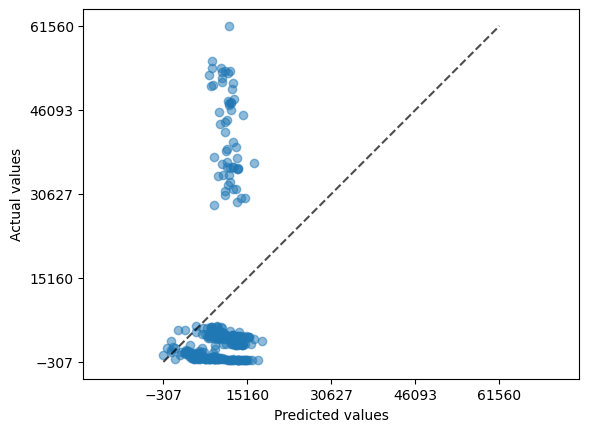

In [27]:
PredictionErrorDisplay.from_predictions(
    y_val,
    model.predict(X_val_prep),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

Небольшие выводы по модели:

* Используя только 3 числовых признака можно довольно неплохо предсказывать объем продаж

* Больше проблем при предсказании высоких объемов продаж

* Увеличение количества рейтингов и цены книги положительно сказывается на объеме продаж, рейтинга книги - отрицательно



## Объединяем Pipeline Предобработки и Модель

In [28]:
pipe_num = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', SGDRegressor(random_state = 42))
])

In [29]:
pipe_num['model']

SGDRegressor(random_state=42)

In [30]:
pipe_num.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('norm',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Book_average_rating',
                                                   'Book_ratings_count',
                                                   'sale price'])])),
                ('model', SGDRegressor(random_state=42))])

In [31]:
B0, B = get_coefs(pipe_num['model'])
features_names = list(columns_num)

print_model (B0,B,features_names)

Решение
14121.967-652.56*Age+4083.45*Book_average_rating-15883.17*Book_ratings_count-1780.39*sale price


In [32]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: 0.0673


r2 на валидационной выборке: 0.0502
mse на тренировочной выборке: 220583484.4008
mse на валидационной выборке: 234584120.7330
rmse на тренировочной выборке: 14852.0532
rmse на валидационной выборке: 15316.1392


In [33]:
cross_validation (X_train, y_train,
                  pipe_num,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.015004,0.006001,0.125346,-2.183061e+08,-10518.020700,-49809.570165
1,0.016004,0.004000,0.104088,-1.934366e+08,-10834.252568,-42652.748136
2,0.012003,0.004000,0.050639,-2.408258e+08,-11410.492380,-51757.385288
3,0.013003,0.004001,0.041421,-2.240108e+08,-11952.264097,-42586.466147
4,0.013003,0.004001,0.108839,-2.165505e+08,-10898.771661,-46321.266863




test_R2      8.606680e-02
test_-MSE   -2.186259e+08
test_-MAE   -1.112276e+04
test_-Max   -4.662549e+04
dtype: float64


## Оценим влияние предварительной обработки целевой переменной

In [34]:
pipe_num_transform = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', TransformedTargetRegressor( regressor=SGDRegressor(random_state = 42),
    transformer=PowerTransformer())
    )
])

In [35]:
pipe_num_transform.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('norm',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Book_average_rating',
                                                   'Book_ratings_count',
                                                   'sale price'])])),
                ('model',
                 TransformedTargetRegressor(regressor=SGDRegressor(random_state=42),
                                            transformer=PowerTransformer()))])

In [36]:
B0, B = get_coefs(pipe_num_transform['model'].regressor_)
features_names = list(columns_num)

print_model (B0,B,features_names)

Решение
0.131-0.15*Age+0.17*Book_average_rating-0.57*Book_ratings_count-0.02*sale price


In [37]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

Смещение (член нулевого порядка) уменьшился по модулю, влияние Book_ratings_count уступило влиянию sale price, Book_average_rating сильно не изменился.

In [38]:
cross_validation (X_train, y_train,
                  pipe_num_transform,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.013003,0.005002,-0.178049,-2.940309e+08,-8562.503122,-57960.771653
1,0.013002,0.004002,-0.240044,-2.677382e+08,-8775.875760,-51219.147646
2,0.012002,0.005001,-0.173380,-2.976529e+08,-8461.054810,-58447.491238
3,0.011002,0.005001,-0.144502,-2.674593e+08,-8211.527215,-53288.711655
4,0.011003,0.005001,-0.190680,-2.893333e+08,-8540.623923,-56367.895340




test_R2     -1.853310e-01
test_-MSE   -2.832429e+08
test_-MAE   -8.510317e+03
test_-Max   -5.545680e+04
dtype: float64


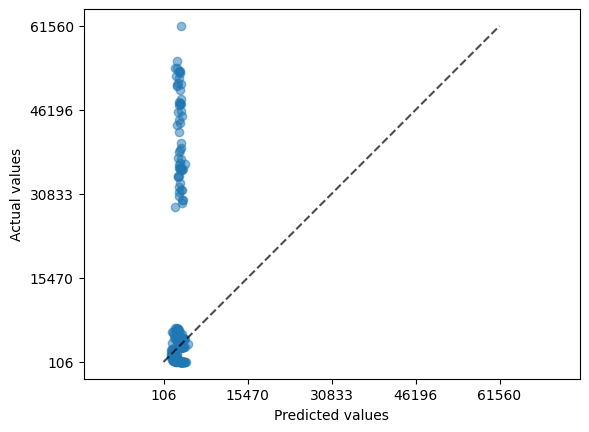

In [39]:
PredictionErrorDisplay.from_predictions(
    y_val,
    pipe_num_transform.predict(X_val),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

Небольшие выводы по модели:

* Предварительная обработка целевой переменной в данном случае не улучшает результаты линейной модели (метрика r2 на кроссвалидации 0.47 против 0.58)

* В целом предварительная обработка целевой переменной сделала хуже предсказание высоких значений цен

* В области низких цен кластеризация несколько уменьшилась, но не ушла полностью (косвенно подтверждает гипотезу о влиянии ограниченного набора значений числовых признаков)



In [40]:
pipe_all_transform = Pipeline([
    ('preprocessors', preprocessors_All),
    ('model', TransformedTargetRegressor( regressor=SGDRegressor(random_state = 42),
    transformer=PowerTransformer())
    )
])

In [41]:
pipe_all_transform.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('norm',
                                                  Pipeline(steps=[('QuantReplace',
                                                                   QuantileReplacer(threshold=0.01)),
                                                                  ('norm',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Book_average_rating',
                                                   'Book_ratings_count',
                                                   'sale price']),
                                                 ('cat',
                                                  Pipeline(steps=[('replace_rare',
                                                                   RareGrouper(threshold=0.0001)),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Author', 'language_code',
                                                   'Author_Rating', 'genre',
                                                   'Publisher'])])),
                ('model',
                 TransformedTargetRegressor(regressor=SGDRegressor(random_state=42),
                                            transformer=PowerTransformer()))])

In [42]:
cat_names = pipe_all_transform['preprocessors'].transformers_[1][1]['encoder'].get_feature_names_out(cat)

# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns = np.hstack([num, cat])

In [43]:
B0, B = get_coefs(pipe_all_transform['model'].regressor_)
features_names = list(columns)

print_model (B0,B,features_names)

Решение
0.106-0.16*Age-0.09*Book_average_rating-0.53*Book_ratings_count+0.01*sale price+0.04*Author-0.02*language_code+0.04*Author_Rating-0.03*genre-0.01*Publisher


In [44]:
def vis_weigths_threshold(weights, feature_names, threshold, width = 1200, height = 600):
    """Отрисовка весов с фильтром.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    threshold: порог "значимости" коэффициентов
    """
    # фильтруем веса коэффициентов
    mask = np.abs(weights) >= threshold
    weights_filtered = weights[mask]
    feature_names_filtered = [name for name, m in zip(feature_names, mask[1:]) if m]

    # Рисуем столбчатую диаграмму
    vis_weigths(weights_filtered,feature_names_filtered, width = width, height = height)

In [45]:
Bs = np.hstack([B0,B])
vis_weigths_threshold(Bs,columns, 0.08, width = 1800)

In [46]:
cat_names  # Можно посмотреть, что скрывается за индексами

array(['Author_A.S.A. Harrison', 'Author_Agatha Christie',
       'Author_Alan Brennert',
       'Author_Aldous Huxley, Christopher Hitchens', 'Author_Alex Flinn',
       'Author_Alex Garland', 'Author_Alexandra Bracken',
       'Author_Alice Clayton',
       'Author_Allen Ginsberg, William Carlos Williams',
       'Author_Ally Carter', 'Author_Ally Condie',
       'Author_Amanda Hocking', 'Author_Amish Tripathi',
       'Author_Amor Towles', 'Author_Andre Dubus III',
       'Author_Andrew Clements, Brian Selznick', 'Author_Anita Diamant',
       'Author_Anita Shreve', 'Author_Ann Patchett',
       'Author_Anna Quindlen',
       'Author_Anne McCaffrey, Teodor PanasiÅ„ski', 'Author_Anne Rice',
       'Author_Anne Tyler', 'Author_Anonymous, Joseph Smith Jr.',
       'Author_Anthony Bourdain', 'Author_Aravind Adiga',
       'Author_Arnold Lobel', 'Author_Art Spiegelman',
       'Author_Arthur C. Clarke', 'Author_Arthur Conan Doyle',
       'Author_Arthur Conan Doyle, Anne Perry', 'Author_

In [47]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: -0.1430
r2 на валидационной выборке: -0.1457
mse на тренировочной выборке: 270303061.5607
mse на валидационной выборке: 282970326.0897
rmse на тренировочной выборке: 16440.8960
rmse на валидационной выборке: 16821.7219


In [48]:
cross_validation (X_train, y_train,
                  pipe_all_transform,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 73))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.039008,0.007002,-0.190992,-2.249559e+08,-7579.187838,-50942.349549
1,0.046010,0.008002,-0.153668,-2.637030e+08,-7846.940398,-48599.799729
2,0.036008,0.008002,-0.166907,-2.812811e+08,-8621.145001,-55463.476417
3,0.042009,0.008002,-0.158316,-2.980069e+08,-8930.667387,-54760.397967
4,0.041009,0.009002,-0.270623,-3.142499e+08,-10263.874241,-56982.174985




test_R2     -1.881016e-01
test_-MSE   -2.764393e+08
test_-MAE   -8.648363e+03
test_-Max   -5.334964e+04
dtype: float64


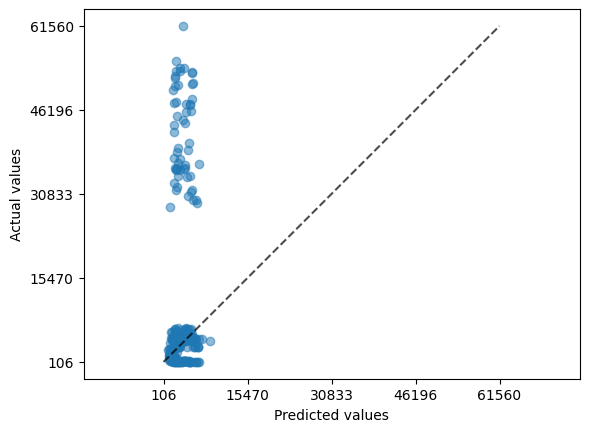

In [49]:
PredictionErrorDisplay.from_predictions(
    y_val,
    pipe_all_transform.predict(X_val),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

Выводы по модели:

* Добавление категориальных признаков не улучшило результаты линейной модели (метрика r2 так и осталась 2.8)

* Результаты так явно не кластеризуются

* Предсказание средних книг улучшилось, но максимальных ухудшилось

* Наиболее значимыми оказались числовые признаки: цена книги и количество рейтингов.

